In [1]:
#Pandasとseabornをインポート
import pandas as pd
import seaborn as sns

#対象データの取得
from sklearn.datasets import load_iris

#datasetという変数を用意
dataset = load_iris()
dataset

#活用するデータの確認
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [2]:
#データの値を確認
df = load_iris(as_frame=True).frame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.shape

(150, 5)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
X = df.to_numpy()
scaler.fit(X)

StandardScaler()

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=0)
model.fit(X)

KMeans(n_clusters=4, random_state=0)

In [7]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 3, 0, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [8]:
df['クラスター'] = model.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,クラスター
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


<Axes: xlabel='クラスター', ylabel='count'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12463 (\N{KATA

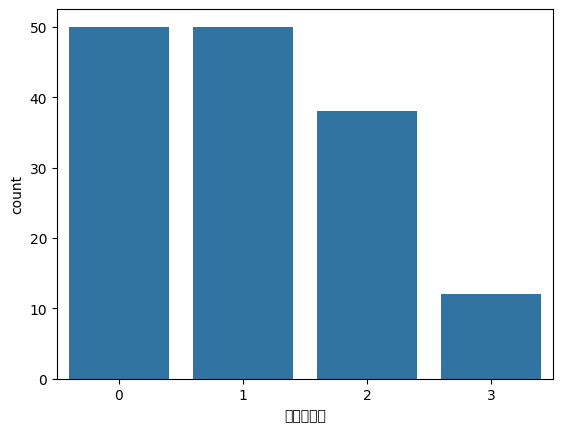

In [9]:
sns.countplot(x='クラスター', data=df)

In [10]:
df.groupby('クラスター').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
クラスター,,,,,
0,5.900000,2.760000,4.250000,1.326000,1.020000
1,5.006000,3.428000,1.462000,0.246000,0.000000
2,6.355263,2.939474,5.328947,2.018421,1.973684
3,7.475000,3.125000,6.300000,2.050000,2.000000


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12463 (\N{KATA

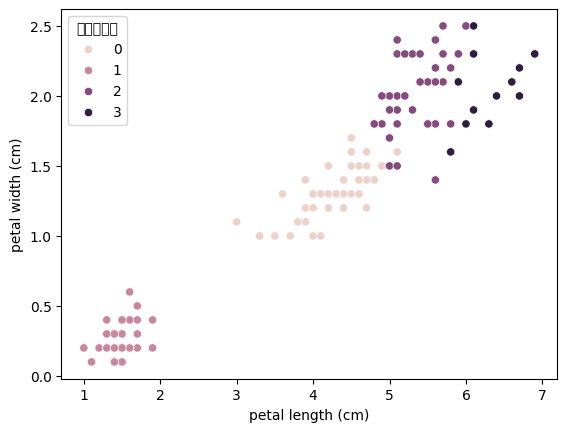

In [18]:
#クラスター０と１で、petal length (cm)の値が大きく差がついてる

sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='クラスター', data=df)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

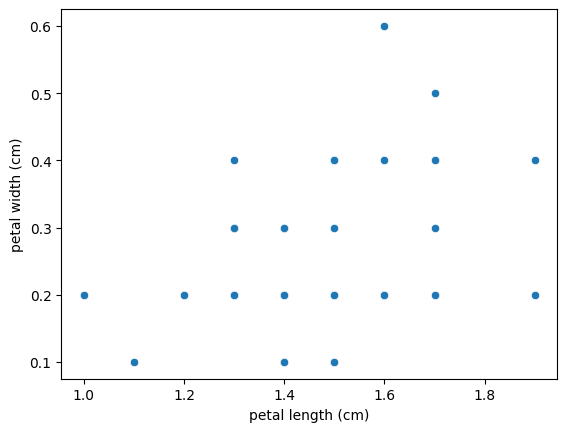

In [19]:
df_cluster1 = df.query('クラスター == 1')
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=df_cluster1)

<Axes: xlabel='petal length (cm)', ylabel='Count'>

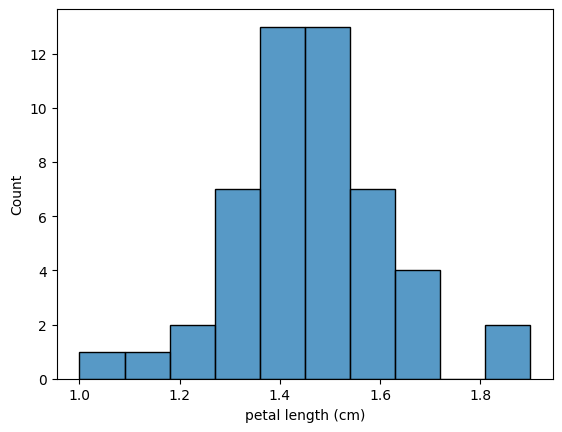

In [21]:
sns.histplot(x='petal length (cm)', data=df_cluster1, bins=10)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

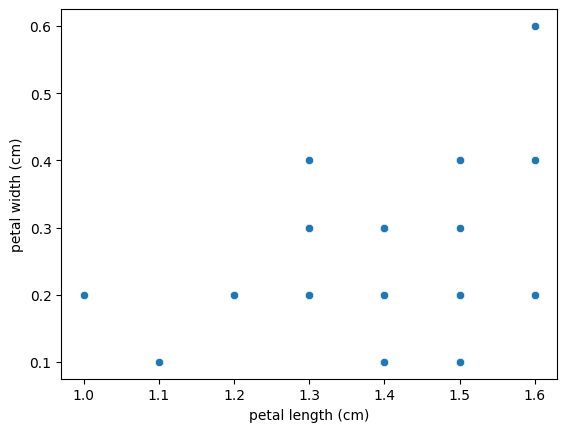

In [22]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=df_cluster1.query('`petal length (cm)` < 1.7'))